# Numb3rs
## Ou comment les maths (ici la loi normale) permet de localiser un tueur ?

# 1. Modèle avec loi normale

pour en savoir plus sur le profilage géographique

cf [http://www.numb3rs-singularity.fr/mathematiques/probabilites-et-statistiques/geographic-profiling](http://www.numb3rs-singularity.fr/mathematiques/probabilites-et-statistiques/geographic-profiling) 
   
##### en anglais [livre Numb3rs](https://books.google.fr/books?id=Wm6SCRVby0kC&lpg=PA6&dq=numb3rs%20geographic%20profiling&hl=fr&pg=PA10#v=onepage&q=numb3rs%20geographic%20profiling&f=true) 

Concernant notre tueur, on a supposé qu'il habitait à une certaine distance des meurtres. On va appeler cette distance moyenne B. Si on prend l'analogie du tuyau d'arrosage de Charlie, il est peu probable que l'au tombe directement à côté du tuyau et à l'inverse l'eau ne va pas aller trop loin : l'eau couvre une certaine bande de gazon autour du tuyau, avec une distance moyenne B entre l'eau et le tuyau. Si on prend une goutte d'eau, on sait donc que le tuyau se trouve également quelque part autour d'une distance B de cette goutte. On va donc définir une fonction gaussienne centrée sur B autour des meurtres ( = goutte d'eau).

création d'une carte 2d avec des données simulées

plus c'est coloré, plus y a de points dans cette zone  

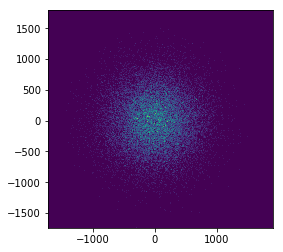

In [2]:
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import math

# Generate some test data
x = 400*np.random.randn(88730)
y = 400*np.random.randn(88730)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(512, 384))
#This makes a 50x50 heatmap. If you want, say, 512x384, you can put bins=(512, 384) in the call to histogram2d.
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

On appelle P(x,y) la probabilité en un point (x,y) du dessin. Pour rappel (application du théorème de Pythagore ), la distance entre un lieu de meurtre de coordonnées (xn, yn) et un point quelconque de coordonnées (x,y) est :

$$d_n=\sqrt{(x_n-x)^2+(y_n-y)^2}$$

On peut donc écrire pour un lieu de meurtre n :

$$ P_n(x,y)=e^{-d_n^2/{2\sigma^2}} $$ 
$\sigma$ 
$ permet de régler la pente ou l'épaisseur de la courbe en cloche (plus $\sigma$ 
$ est petit, plus on arrive vite vers 0).

Cependant, comme le fait remarquer Don à la 11ème minute, un tueur peut couvrir une région large, mais tue rarement près de chez lui : il y a une zone tampon. Nous l'avions appelée B. Corrigeons donc la formule en conséquence :

$$ P_n(x,y)=e^{-(d_n-B)^2/{2\sigma^2}} $$ 


Les différents meurtres étant considérés comme indépendants (bien que fait par le même tueur, un meurtre n'a pas été provoqué par l'un des autres), la probabilité de trouver le domicile du tueur à un point (x,y) peut être calculé en faisant la moyenne des probabilités induites par chaque meurtre :

$$P(x,y)=1/c*\sum_{n=1}^{c}P_n(x,y)$$
(Avec c le nombre de meurtres)

On aboutit donc à la formule finale :

$$P(x,y)=1/c*\sum_{n=1}^{c}e^{-(d_n-B)^2/{2\sigma^2}}(1)$$ 


cas du tueur du tueur qui tue près de chez lui (B=0)
* On créé 12 lieux aléatoires, les zones où se trouve le tueur les plus problables  apparaissent en jaune

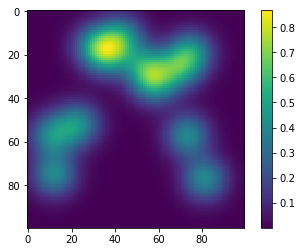

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
n=100 
p = np.zeros((n,n))
lieu=[]
meurtres=12
for i in range(meurtres):
    lieu+=[[np.random.randint(10,90),np.random.randint(10,90)]] #on crée 12 lieux de meurtres aléatoires

for nb in range(len(lieu)):
    for i in range(n):
        for j in range(n):
            p[i,j]=p[i,j]+1*math.exp(-((i-lieu[nb][0])**2+(j-lieu[nb][1])**2)/100)/math.sqrt(2*math.pi) 
            # formule 1 où B=0 calculé pour chacun des points de la grille n*n
plt.imshow(p)
plt.colorbar()
plt.show()


Cependant, comme le fait remarquer Don à la 11ème minute, un tueur peut couvrir une région large, mais tue rarement près de chez lui : il y a une zone tampon. Nous l'avions appelée B. Corrigeons donc la formule en conséquence :
    
cas du tueur qui tue plus loin  de chez lui (B=15):  on créé 6 lieux aléatoires, les zones où se trouve le tueur les plus problables apparaissent en jaune

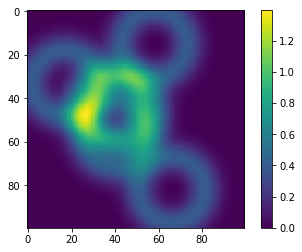

In [4]:
B=15
n=100 
a = np.zeros((n,n))
lieu=[]
meurtres=6
for i in range(meurtres):
    lieu+=[[np.random.randint(10,90),np.random.randint(10,90)]] #on crée le nb de lieux de meurtres aléatoires

for nb in range(len(lieu)):
    for i in range(n):
        for j in range(n):
            a[i,j]=a[i,j]+1*math.exp(-(math.sqrt((i-lieu[nb][0])**2+(j-lieu[nb][1])**2)-B)**2 /50)/math.sqrt(2*math.pi)
            #prise en compte que lassasin ne commet pas le meurtre prêt de chez lui
plt.imshow(a)
plt.colorbar()
plt.show()


# 2. modèle de Rossmo

 cf [https://openclassrooms.com/courses/profilage-geographique](https://openclassrooms.com/courses/profilage-geographique)

la formule de Rossmo est:
$$p_{i,j}=\sum_{n=1}^{c}{\[ \frac{\phi}{(|X_i-x_n|+|Y_j-y_n|)^f} + \frac{(1-\phi)(B^{g-f})}{(2B-|X_i-x_n|-|Y_j-y_n|)^g}\] } $$
avec:
- $p_{i,j}$  : probabilité p que le tueur réside à la coordonnée (i;j).
- c∈N : nombre de crimes.
- $X_i,Y_j$∈N : position du point de coordonnées (i;j).
- $x_n,y_n$∈N : coordonnées du crime n.
- f∈R : accentue (f>0) ou diminue (f<0) l'effet « plus on s'éloigne, plus la probabilité baisse ».
- g∈R : accentue (g>0) ou diminue (g<0) l'effet de « zone tampon ».
- B∈R : rayon de la zone tampon.
- $\phi=1$ si $(∣X_i−x_n∣+∣Y_i−y_n∣)$>B ⟺$(X_n,Y_n)$∈[−B;B] et sinon $\phi=0$  



En d'autres termes, si l'on se trouve hors de la zone tampon ( si $(∣X_i−x_n∣+∣Y_i−y_n∣)>B $, alors $\phi$ vaut 1. Que se passe-t-il si $\phi$ vaut 1 ? Eh bien, la deuxième fraction s'annule. En effet : (1-1) = 0. On obtient donc :

$$p_{i,j}=\sum_{n=1}^c{\frac{1}{(|X_i−x_n|+|Y_j−y_n|)^f}}$$

Dans le cas contraire, ϕ = 0. Dans cette éventualité, c'est la première fraction qui s'annule. On obtient donc :

$$p_{i,j}=\sum_{n=1}^c{\frac{B^{g-f}}{(2B-|X_i−x_n|-|Y_j−y_n|)^f}}$$



5.98179996259e-08


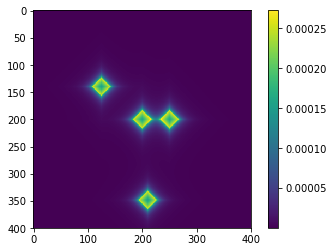

(None, None)

In [66]:
n=400
a = np.zeros((n,n))
crimes=[(200,200), (140,125) , (348,210) ,[200,250]]
b=100.3
f=3
g=6

for j in range(n):
    for i in range(n):
       for crime in crimes:
           distance= abs(i-crime[0])+abs(j-crime[1])
           if distance>B:
               a[i,j]+= (1/math.pow(distance, f))# 1er terme de la somme
           else:
               numerator= (1)*math.pow(b, 8-f)
               denominator= math.pow(2*b-distance, g)
               a[i,j]+= (numerator/denominator)# 2e terme de la somme

#a=a/np.max(a)   
print(np.min(a))
plt.imshow(a),plt.colorbar()
plt.savefig('rossmoSim.png'),plt.show()

       
